#  Restaurant Tips Analysis (EDA Project)

## Introduction
Tipping is a common practice in restaurants, but the **factors influencing how much people tip** can vary.  
The goal of this project is to explore the **Tips dataset** (a built-in dataset in the Seaborn library) and answer questions such as:  
- Do men or women tip more?  
- Do smokers tip differently than non-smokers?  
- Are tips higher during lunch or dinner?  
- Does the size of the total bill affect the size of the tip?  
- Do larger groups leave bigger tips (percentage-wise)?  

By performing **Exploratory Data Analysis (EDA)**, we will:  
1. Understand the structure of the dataset.  
2. Visualize distributions of key variables (bill, tip, tip percentage).  
3. Explore relationships between tipping behavior and other factors (day, time, gender, smoker status).  
4. Summarize key insights that could help restaurants understand their customers better.  

## Dataset Overview
- **Name:** Tips Dataset  
- **Source:** Built into the `seaborn` library (no download required)  
- **Size:** 244 rows × 7 columns  
- **Features:**  
  - `total_bill` → Total bill in USD  
  - `tip` → Tip amount in USD  
  - `sex` → Gender of the customer  
  - `smoker` → Whether the customer is a smoker or not  
  - `day` → Day of the week (Thur, Fri, Sat, Sun)  
  - `time` → Meal time (Lunch or Dinner)  
  - `size` → Number of people in the dining party  

## Objective
The objective is to **analyze tipping patterns** and draw insights about customer behavior.  
This small but rich dataset is perfect for a beginner-friendly EDA project, allowing us to practice **data cleaning, visualization, and interpretation**.


# Step 1 — Setup & Imports


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")
pd.set_option("display.precision", 3)


# Step 2 — Load Dataset
(Seaborn’s `tips` dataset is built-in, so no downloading needed.)


In [48]:
df = sns.load_dataset("tips")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Step 3 — Quick Overview
(Checking shape, datatypes, and missing values to understand what we’re working with.)


In [49]:
print("Shape (rows, cols):", df.shape)
print("\nDtypes / Missing:\n"); 
print(df.info())
print("\nMissing per column:\n"); 
print(df.isna().sum())
display(df.describe())


Shape (rows, cols): (244, 7)

Dtypes / Missing:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Missing per column:

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


,total_bill,tip,size
count,244.000,244.000,244.000
mean,19.786,2.998,2.570
std,8.902,1.384,0.951
min,3.070,1.000,1.000
25%,13.348,2.000,2.000
50%,17.795,2.900,2.000
75%,24.127,3.562,3.000
max,50.810,10.000,6.000


## Fixing missing value


In [50]:
pivot_day_time = pivot_day_time.fillna("N/A")


# Step 4 — Create Helpful Feature: Tip Percentage (Data pre-prcesssing)
(Tip % makes comparisons fair across different bill sizes.)


In [51]:
df["tip_percent"] = (df["tip"] / df["total_bill"]) * 100
df[["total_bill","tip","size","tip_percent"]].head()


,total_bill,tip,size,tip_percent
0,16.99,1.01,2,5.945
1,10.34,1.66,3,16.054
2,21.01,3.50,3,16.659
3,23.68,3.31,2,13.978
4,24.59,3.61,4,14.681


# Step 5 — Univariate Distributions (Numeric)
(Look at the shape of each numeric variable.)


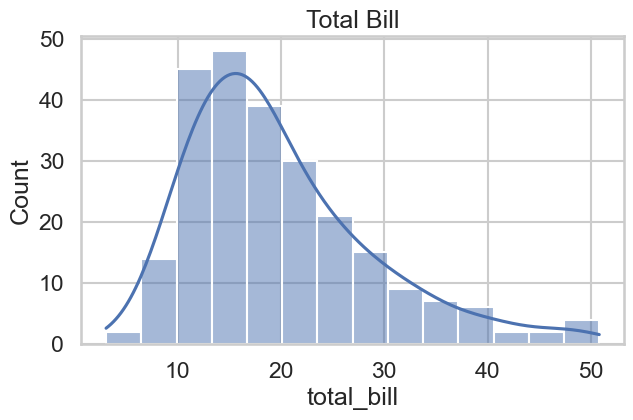

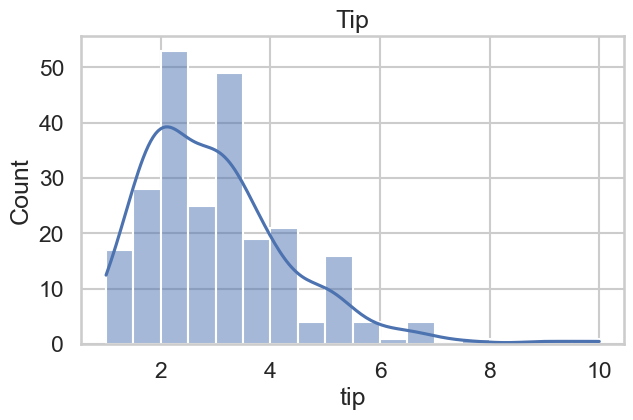

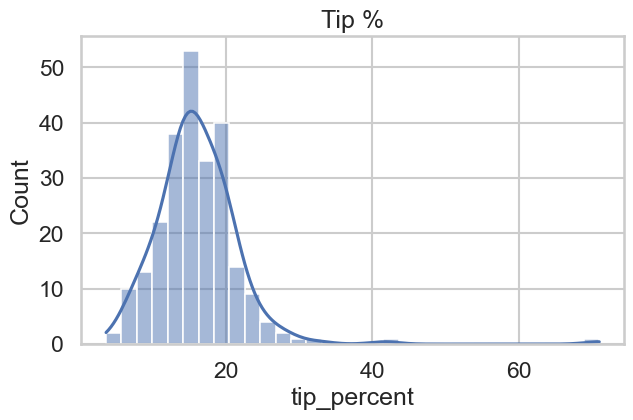

In [52]:
plt.figure(figsize=(7,4)); 
sns.histplot(df["total_bill"], kde=True); 
plt.title("Total Bill"); 
plt.show()

plt.figure(figsize=(7,4)); 
sns.histplot(df["tip"], kde=True); 
plt.title("Tip"); 
plt.show()

plt.figure(figsize=(7,4)); 
sns.histplot(df["tip_percent"], kde=True); 
plt.title("Tip %"); 
plt.show()


# Step 6 — Univariate Counts (Categorical)
(Understand the mix of days, time, gender, and smoker status.)


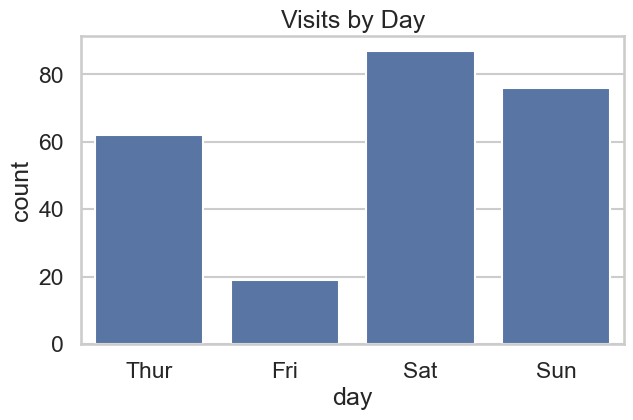

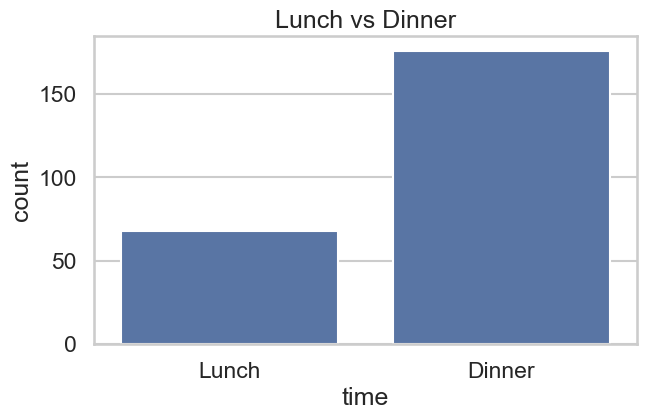

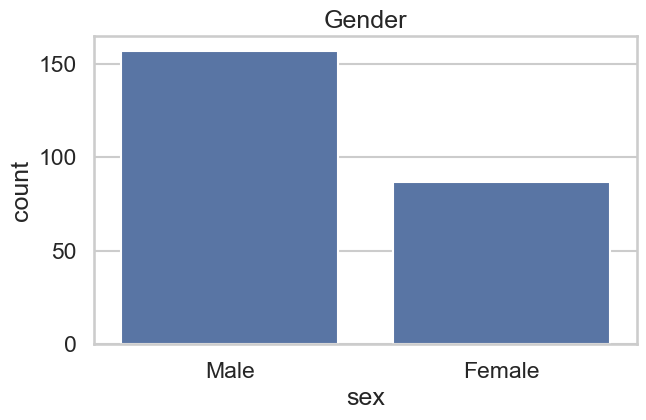

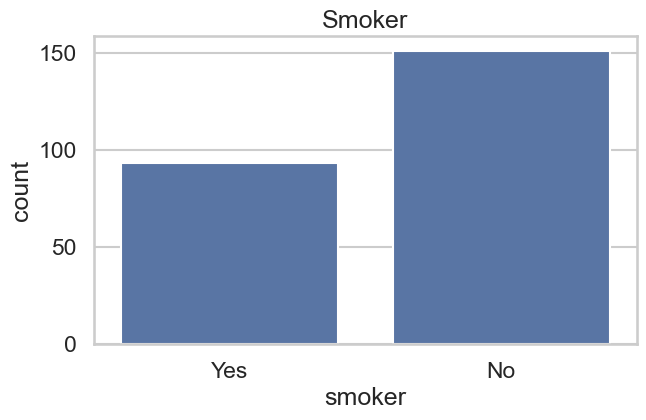

In [53]:
plt.figure(figsize=(7,4)); 
sns.countplot(data=df, x="day");
plt.title("Visits by Day"); 
plt.show()

plt.figure(figsize=(7,4));
sns.countplot(data=df, x="time"); 
plt.title("Lunch vs Dinner"); 
plt.show()

plt.figure(figsize=(7,4)); 
sns.countplot(data=df, x="sex"); 
plt.title("Gender"); 
plt.show()

plt.figure(figsize=(7,4)); 
sns.countplot(data=df, x="smoker"); 
plt.title("Smoker"); 
plt.show()


# Step 7 — Relationship: Total Bill vs Tip
(Do bigger bills lead to bigger tips? Add a trend line.)


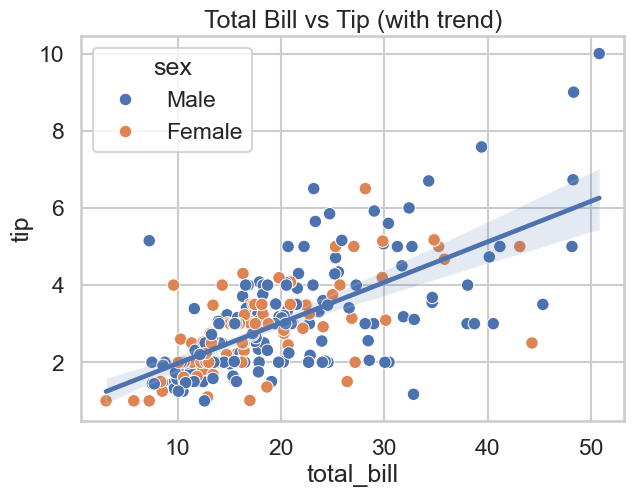

In [54]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex")
sns.regplot(data=df, x="total_bill", y="tip", scatter=False)
plt.title("Total Bill vs Tip (with trend)")
plt.show()


# Step 8 — Compare Tip % Across Categories
(See how tipping behavior changes by day, time, and smoker status.)


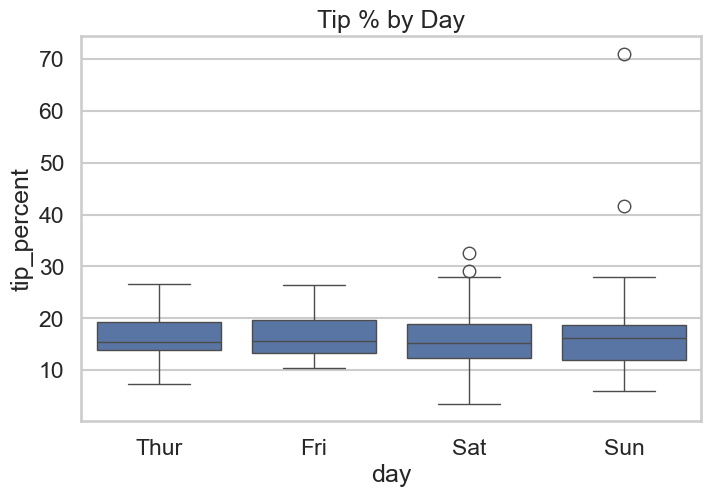

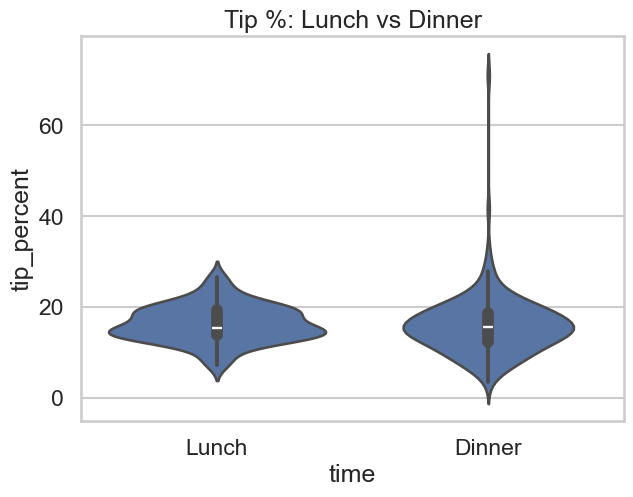

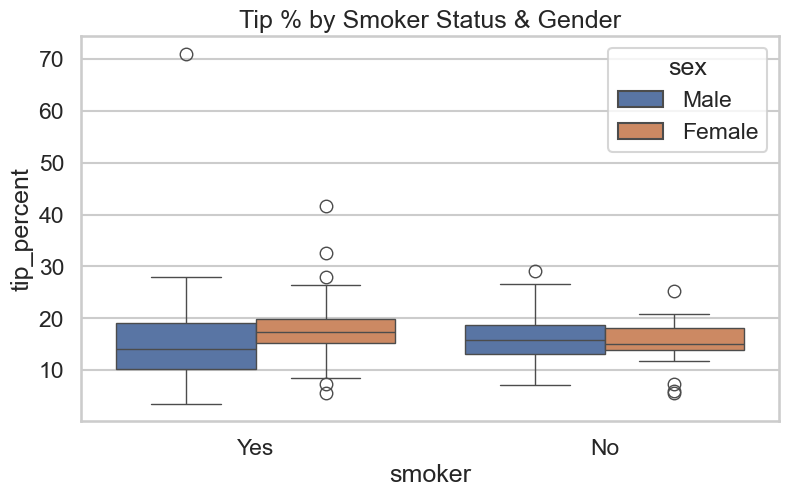

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="day", y="tip_percent")
plt.title("Tip % by Day"); plt.show()

plt.figure(figsize=(7,5))
sns.violinplot(data=df, x="time", y="tip_percent")
plt.title("Tip %: Lunch vs Dinner"); plt.show()

plt.figure(figsize=(9,5))
sns.boxplot(data=df, x="smoker", y="tip_percent", hue="sex")
plt.title("Tip % by Smoker Status & Gender"); plt.show()


# Step 9 — Grouped Summaries (Quick Insight Tables)
(Calculate average tip % by different categories.)


In [56]:
overall = df["tip_percent"].mean().round(2)
by_day = df.groupby("day")["tip_percent"].mean().sort_values(ascending=False).round(2)
by_time = df.groupby("time")["tip_percent"].mean().round(2)
by_sex  = df.groupby("sex")["tip_percent"].mean().round(2)
by_smok = df.groupby("smoker")["tip_percent"].mean().round(2)

print("Overall mean tip %:", overall)
display(by_day.to_frame("avg_tip_%"))
display(by_time.to_frame("avg_tip_%"))
display(by_sex.to_frame("avg_tip_%"))
display(by_smok.to_frame("avg_tip_%"))

pivot_day_time = pd.pivot_table(df, index="day", columns="time", values="tip_percent", aggfunc="mean").round(2)
display(pivot_day_time)


Overall mean tip %: 16.08


C:\Users\DELL\AppData\Local\Temp\ipykernel_10892\64357998.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_day = df.groupby("day")["tip_percent"].mean().sort_values(ascending=False).round(2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10892\64357998.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_time = df.groupby("time")["tip_percent"].mean().round(2)
C:\Users\DELL\AppData\Local\Temp\ipykernel_10892\64357998.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to 

,avg_tip_%
day,
Fri,16.99
Sun,16.69
Thur,16.13
Sat,15.32


,avg_tip_%
time,
Lunch,16.41
Dinner,15.95


,avg_tip_%
sex,
Male,15.77
Female,16.65


,avg_tip_%
smoker,
Yes,16.32
No,15.93


C:\Users\DELL\AppData\Local\Temp\ipykernel_10892\64357998.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_day_time = pd.pivot_table(df, index="day", columns="time", values="tip_percent", aggfunc="mean").round(2)


time,Lunch,Dinner
day,,
Thur,16.13,15.97
Fri,18.88,15.89
Sat,NaN,15.32
Sun,NaN,16.69


# Step 10 — Party Size Effects
(Do larger groups leave higher or lower tip %?)


,total_bill,tip,tip_percent
size,,,
1,7.24,1.44,21.73
2,16.45,2.58,16.57
3,23.28,3.39,15.22
4,28.61,4.14,14.59
5,30.07,4.03,14.15
6,34.83,5.22,15.62


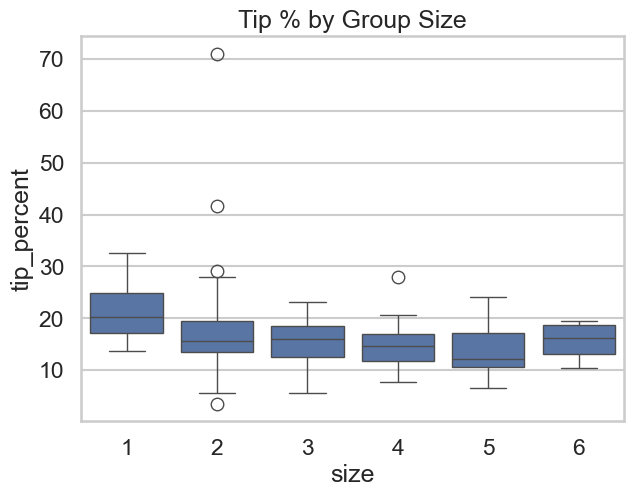

In [57]:
size_summary = df.groupby("size")[["total_bill","tip","tip_percent"]].mean().round(2)
display(size_summary)

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="size", y="tip_percent")
plt.title("Tip % by Group Size"); plt.show()


# Step 11 — Correlation Heatmap (Numeric Only)
(See which numeric variables move together.)


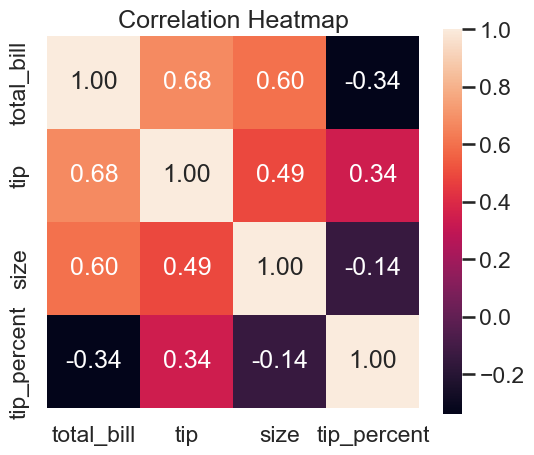

In [58]:
num_cols = ["total_bill","tip","size","tip_percent"]
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


# Step 12 — Quick Text Summary (Auto)
(Print a few headline insights to help write my conclusion.)



In [59]:
print(
    f"""Quick Insights
----------------
• Average tip % overall: {overall:.2f}
• Highest days by avg tip % (desc):
{by_day.to_string()}
• Lunch vs Dinner (avg tip %):
{by_time.to_string()}
• Smokers vs Non-smokers (avg tip %):
{by_smok.to_string()}
"""
)


Quick Insights
----------------
• Average tip % overall: 16.08
• Highest days by avg tip % (desc):
day
Fri     16.99
Sun     16.69
Thur    16.13
Sat     15.32
• Lunch vs Dinner (avg tip %):
time
Lunch     16.41
Dinner    15.95
• Smokers vs Non-smokers (avg tip %):
smoker
Yes    16.32
No     15.93



# Step 13 — Save Outputs
(Save cleaned dataset and a sample figure for my portfolio.)


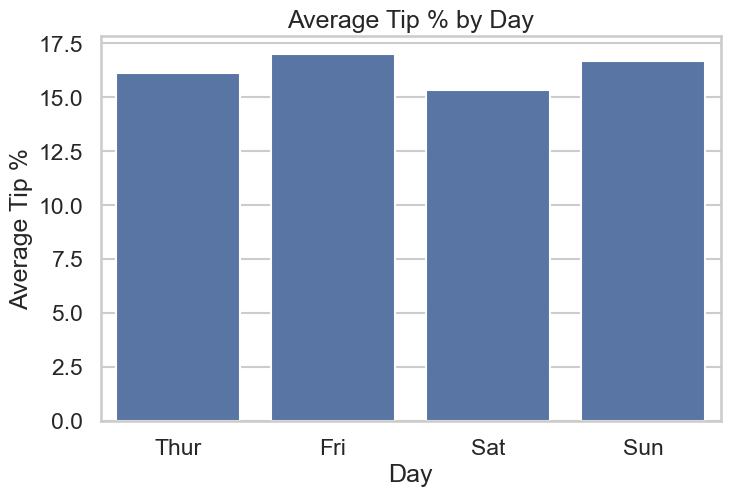

In [60]:
df.to_csv("tips_with_tip_percent.csv", index=False)

plt.figure(figsize=(8,5))
sns.barplot(x=by_day.index, y=by_day.values)
plt.title("Average Tip % by Day")
plt.ylabel("Average Tip %")
plt.xlabel("Day")
plt.savefig("avg_tip_percent_by_day.png", dpi=150, bbox_inches="tight")
plt.show()


# Step 14 References
- Seaborn dataset docs: `sns.load_dataset("tips")`  
- Libraries: **pandas**, **matplotlib**, **seaborn**, (optional) **scipy**  


# Step-15 Conclusion

From the analysis of the Tips dataset, we found:

-  **Average tip percentage** is about **16.08%** of the total bill.  
-  **Best tipping days** are **Friday (16.99%)** and **Sunday (16.69%)**, while Saturday shows the lowest tipping percentage (15.32%).  
-  **Lunch customers tip slightly higher (16.41%) than dinner customers (15.95%)**.  
-  **Smokers tip a bit more (16.32%) than non-smokers (15.93%)**, though the difference is small.  

Overall, tipping behavior varies by **day of the week, meal time, and smoker status**, but the differences are modest.  

---

###  Business Takeaway

- **Weekend focus**: Restaurants can expect slightly better tips on **Fridays and Sundays**, making these ideal days for promotions or staffing experienced waiters.  
- **Lunch vs Dinner**: Since lunch tips are a little higher percentage-wise, staff can be motivated to maintain excellent lunchtime service.  
- **Smoker vs Non-smoker**: The small difference suggests behavior is not strongly influenced by smoking status, but it’s still a factor worth noting.  
- **Staff planning**: Understanding when tips are higher helps managers schedule staff to maximize both **customer satisfaction** and **employee earnings**.  

This analysis shows how even a small dataset can reveal **actionable insights** for restaurant management.  

